In [165]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split



In [166]:
Train_Dataset = pd.read_csv("TrainData.txt", header = None)
Test_Dataset = pd.read_csv("TestData.txt", header = None)
Train_Dataset

0      1      2      3      4      5      6      7      8      9    ...  \
0       5 -1.000 -1.000 -1.000 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853  ...   
1       3 -1.000 -1.000 -1.000 -1.000 -1.000 -0.928 -0.204  0.751  0.466  ...   
2       3 -1.000 -1.000 -1.000 -0.830  0.442  1.000  1.000  0.479 -0.328  ...   
3       3 -1.000 -1.000 -1.000 -1.000 -1.000 -0.104  0.549  0.579  0.579  ...   
4       3 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -0.107  1.000  1.000  ...   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
1209    3 -1.000 -0.882 -0.334  0.267  0.333  0.749  1.000  1.000  1.000  ...   
1210    3 -0.985 -0.048  0.226  0.226  0.226 -0.355 -0.807 -1.000 -0.726  ...   
1211    3 -1.000 -1.000 -1.000 -0.988 -0.527 -0.208  0.620  1.000  0.467  ...   
1212    3 -1.000 -1.000 -1.000 -0.990  0.708  0.557  0.347 -0.107 -0.758  ...   
1213    3 -1.000 -1.000 -1.000 -0.783 -0.984 -0.827  0.068  1.000  1.000  ...   

        247    248    249    250    251    252    253    254    255  256  
0    -0.671 -0.671 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828 -1.0  
1     0.466  0.639  1.000  1.000  0.791  0.439 -0.199 -0.883 -1.000 -1.0  
2     1.000  0.671  0.345 -0.507 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0  
3     0.388  0.579  0.811  1.000  1.000  0.715  0.107 -0.526 -1.000 -1.0  
4    -0.280  0.322  0.813  1.000  1.000  0.633 -0.144 -0.994 -1.000 -1.0  
...     ...    ...    ...    ...    ...    ...    ...    ...    ...  ...  
1209  0.968  1.000  1.000  1.000  0.809  0.325 -0.820 -1.000 -1.000 -1.0  
1210 -0.307 -0.555 -0.555 -0.555 -0.556 -1.000 -1.000 -1.000 -1.000 -1.0  
1211 -0.116  0.899  0.416 -0.510 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0  
1212  0.697  0.636  0.167 -0.968 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0  
1213  0.805  1.000  1.000  0.727 -0.342 -0.933 -1.000 -1.000 -1.000 -1.0  

[1214 rows x 257 columns]

In [167]:
train_pred = Train_Dataset[0]
train_pred

0       5
1       3
2       3
3       3
4       3
       ..
1209    3
1210    3
1211    3
1212    3
1213    3
Name: 0, Length: 1214, dtype: int64

In [168]:
train_data = Train_Dataset.drop([0], axis = 1)
train_data

1      2      3      4      5      6      7      8      9      10   \
0    -1.000 -1.000 -1.000 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853 -1.000   
1    -1.000 -1.000 -1.000 -1.000 -1.000 -0.928 -0.204  0.751  0.466  0.234   
2    -1.000 -1.000 -1.000 -0.830  0.442  1.000  1.000  0.479 -0.328 -0.947   
3    -1.000 -1.000 -1.000 -1.000 -1.000 -0.104  0.549  0.579  0.579  0.857   
4    -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -0.107  1.000  1.000  0.877   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1209 -1.000 -0.882 -0.334  0.267  0.333  0.749  1.000  1.000  1.000  1.000   
1210 -0.985 -0.048  0.226  0.226  0.226 -0.355 -0.807 -1.000 -0.726 -0.555   
1211 -1.000 -1.000 -1.000 -0.988 -0.527 -0.208  0.620  1.000  0.467  0.396   
1212 -1.000 -1.000 -1.000 -0.990  0.708  0.557  0.347 -0.107 -0.758 -0.975   
1213 -1.000 -1.000 -1.000 -0.783 -0.984 -0.827  0.068  1.000  1.000  1.000   

      ...    247    248    249    250    251    252    253    254    255  256  
0     ... -0.671 -0.671 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828 -1.0  
1     ...  0.466  0.639  1.000  1.000  0.791  0.439 -0.199 -0.883 -1.000 -1.0  
2     ...  1.000  0.671  0.345 -0.507 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0  
3     ...  0.388  0.579  0.811  1.000  1.000  0.715  0.107 -0.526 -1.000 -1.0  
4     ... -0.280  0.322  0.813  1.000  1.000  0.633 -0.144 -0.994 -1.000 -1.0  
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...  
1209  ...  0.968  1.000  1.000  1.000  0.809  0.325 -0.820 -1.000 -1.000 -1.0  
1210  ... -0.307 -0.555 -0.555 -0.555 -0.556 -1.000 -1.000 -1.000 -1.000 -1.0  
1211  ... -0.116  0.899  0.416 -0.510 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0  
1212  ...  0.697  0.636  0.167 -0.968 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0  
1213  ...  0.805  1.000  1.000  0.727 -0.342 -0.933 -1.000 -1.000 -1.000 -1.0  

[1214 rows x 256 columns]

In [169]:
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.M = None
        self.training_errors = []
        self.prediction_errors = []

    def fit(self, X, y, M):
        self.alphas = [] 
        self.training_errors = []
        self.M = M
        for m in range(0, M):
            if m == 0:
                w_i = np.ones(len(y)) * 1 / len(y) 
            else:
                w_i = update_weights(w_i, alpha_m, y, y_pred)
            G_m = DecisionTreeClassifier(max_depth = 1)    
            G_m.fit(X, y, sample_weight = w_i)
            y_pred = G_m.predict(X)
            
            self.G_M.append(G_m) 
            error_m = compute_error(y, y_pred, w_i)
            self.training_errors.append(error_m)


            alpha_m = compute_alpha(error_m)
            self.alphas.append(alpha_m)

        assert len(self.G_M) == len(self.alphas)
        
    def predict(self, X):
        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

In [170]:
def compute_error(y, y_pred, w_i):
    return (sum(w_i * (np.not_equal(y, y_pred)).astype(int)))/sum(w_i)

def compute_alpha(error):
    return np.log((1 - error) / error)

def update_weights(w_i, alpha, y, y_pred):
    return w_i * np.exp(alpha * (np.not_equal(y, y_pred)).astype(int))

In [171]:
df = pd.read_csv('TrainData.txt', header = None)
print(df[0])
df[0]=df[0].replace({3:-1,5:1})   
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 0).values, df[0].values,train_size = 0.7,random_state = 42)



0       5
1       3
2       3
3       3
4       3
       ..
1209    3
1210    3
1211    3
1212    3
1213    3
Name: 0, Length: 1214, dtype: int64


In [172]:
ab = AdaBoost()
ab.fit(X_train, y_train, M = 1500)
train_out = ab.predict(X_test)
train_out

0     -1
1     -1
2      1
3     -1
4      1
      ..
360    1
361   -1
362   -1
363    1
364   -1
Length: 365, dtype: int64

In [173]:
test_data = Test_Dataset.replace({3:-1,5:1})
print(test_data)

     0    1      2      3      4      5      6      7      8      9    ...  \
0   -1.0 -1.0 -1.000 -0.593  0.700  1.000  1.000  1.000  1.000  0.853  ...   
1   -1.0 -1.0 -1.000  0.264  0.532 -0.210 -0.746 -0.779 -1.000 -1.000  ...   
2   -1.0 -1.0 -0.983  0.662 -0.509 -1.000 -1.000 -1.000 -1.000 -1.000  ...   
3   -1.0 -1.0 -1.000 -0.941 -0.120  0.858  1.000  1.000  1.000  0.698  ...   
4   -1.0 -1.0 -1.000 -1.000 -0.933  0.461  0.779  0.584  0.584  0.584  ...   
..   ...  ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
321 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -0.945  ...   
322 -1.0 -1.0 -1.000 -1.000 -1.000 -0.565  0.388  1.000  1.000  1.000  ...   
323 -1.0 -1.0 -1.000 -0.939  0.536  1.000  1.000  1.000  0.871  0.264  ...   
324 -1.0 -1.0 -1.000 -0.885 -0.280 -0.411 -0.920 -0.920 -0.920 -0.920  ...   
325 -1.0 -1.0 -1.000 -1.000 -1.000 -0.417  0.814  1.000  0.775 -0.723  ...   

       246    247    248    249    250    251    252    253    

In [174]:
prediction = ab.predict(test_data)
prediction

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
321    1
322    1
323   -1
324    1
325   -1
Length: 326, dtype: int64

In [175]:
train_output = train_out.replace({-1:3,1:5})
final_prediction = prediction.replace({-1:3,1:5})
print(prediction)
print(train_out)
print(train_pred)

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
321    1
322    1
323   -1
324    1
325   -1
Length: 326, dtype: int64
0     -1
1     -1
2      1
3     -1
4      1
      ..
360    1
361   -1
362   -1
363    1
364   -1
Length: 365, dtype: int64
0       5
1       3
2       3
3       3
4       3
       ..
1209    3
1210    3
1211    3
1212    3
1213    3
Name: 0, Length: 1214, dtype: int64


In [176]:
from sklearn.metrics import f1_score
f1_score(y_test,train_out)

0.967359050445104

In [177]:
def accuracy(y_actual, y_pred):
        accuracy = np.sum(y_actual == y_pred) / len(y_actual)
        return accuracy


total = accuracy(y_test,train_out)
total

0.9698630136986301

In [178]:
pd.DataFrame(final_prediction).to_csv("prediction.txt", index=False,header=False)

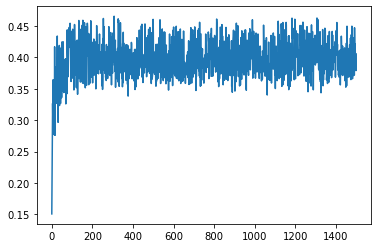

In [179]:
import matplotlib.pyplot as plt
plt.plot(ab.training_errors)

In [180]:
error = 1 - total
error

0.03013698630136985

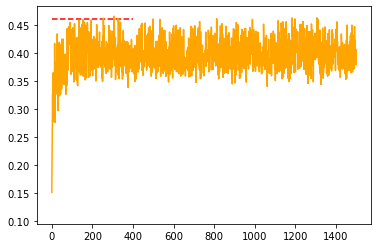

In [186]:
plt.plot(error)
plt.plot(ab.training_errors, color = 'orange')
plt.hlines(0.46, 0, 400, colors = 'red', linestyles='dashed')

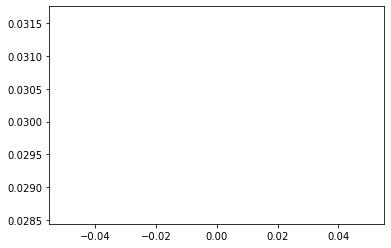

In [182]:
def calculate_error(y, y_pred, w_i):
   
    return (sum(w_i * (np.not_equal(y, y_pred)).astype(int)))/sum(w_i)

error = round(compute_error(y_test, train_out, np.ones(len(y_test))), 4)
plt.plot(error)


In [183]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
values = clf.predict(X_test)


In [184]:
initial = 0
for i in range(len(values)):
    if values[i] == y_test[i]:
        initial+= 1

initial        
accuracy =  initial/len(values)
error = 1-accuracy
error


0.11232876712328765

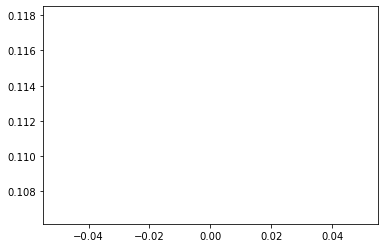

In [185]:
plt.plot(error)